In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Nihan Sayyed/Downloads/Salary_Data.csv')


In [3]:
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape


(30, 2)

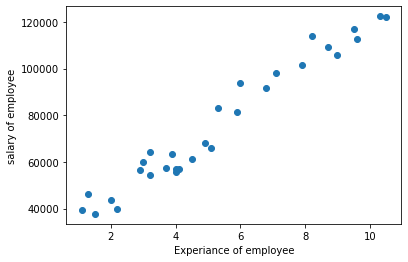

In [5]:
#Relation between Experience and salary
plt.xlabel("Experiance of employee")
plt.ylabel("salary of employee")
plt.scatter(x=df['YearsExperience'],y=df['Salary'])
plt.show()

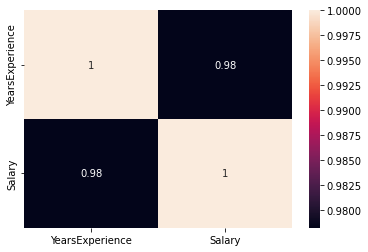

In [6]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
df.corr().round(3)


,YearsExperience,Salary
YearsExperience,1.000,0.978
Salary,0.978,1.000


In [ ]:
#As seen here salary and Experince has strong positive correlation
#salary linearly increases with increasing experience

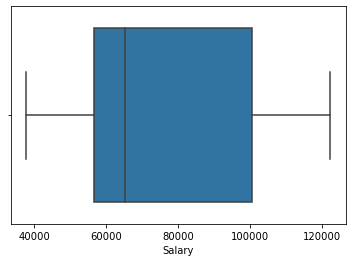

In [8]:
sns.boxplot(x='Salary',data=df)
plt.show()

In [9]:
#X (depended variable) -- Salary
#Y (Independed variable) -- YearsExperience
X=df[["YearsExperience"]]
Y=df["Salary"]

In [10]:
#Model Training
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
#Linear Regression
from sklearn.linear_model import LinearRegression
#create object of LinearRegression class
lr=LinearRegression()
#train the model with 70% data
lr.fit(X_train,Y_train)


LinearRegression()

In [13]:
m=lr.coef_
print("slope /coefficient is : ",m)

slope /coefficient is :  [9202.23359825]


In [14]:
c=lr.intercept_
print("Intercept : ",c)

Intercept :  26049.577715443353


In [15]:
#Test Model with test data
#Test the model , use inbuilt method predict()
#Y_pred = m*X_test + C

Y_pred=lr.predict(X_test)

In [ ]:
#Equation Of Predicted line
#Y = m*x + c
#Y = 9202.23 * x + 26049.57
#Evaluation of Model

In [16]:
#R2 Score 

print("R2 Score : ",r2_score(Y_test,Y_pred))

R2 Score :  0.9248580247217075


In [17]:
lr.score(X_test,Y_test)

0.9248580247217075

In [18]:
#Mean Squared Error 1/n*sum(Y-Y-pred)**2

print("MSE: ",mean_squared_error(Y_test,Y_pred))

MSE:  39139215.99958858


In [19]:
#Predict salary with experience of 5.3 yrs
lr.predict([[5.3]])

array([74821.41578619])

In [20]:
#Compare Actual o/p with Predicted o/p
dict={'Actual Output':Y_test,'Predicted output':Y_pred}
df1=pd.DataFrame(dict)
df1['Residual']=df1['Actual Output']-df1['Predicted output']
df1

,Actual Output,Predicted output,Residual
17,83088.0,74821.415786,8266.584214
21,98273.0,91385.436263,6887.563737
10,63218.0,61938.288749,1279.711251
19,93940.0,81262.979305,12677.020695
14,61111.0,67459.628908,-6348.628908
20,91738.0,88624.766184,3113.233816
26,116969.0,113470.796899,3498.203101
3,43525.0,44454.044912,-929.044912
24,109431.0,106109.010020,3321.989980


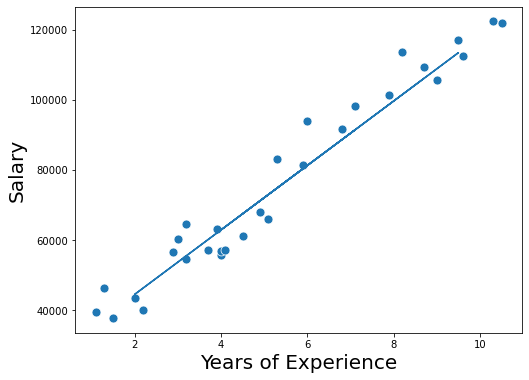

In [21]:
#Get Bestfit line
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="YearsExperience",y="Salary",palette="deep",s=80)
plt.plot(X_test["YearsExperience"],Y_pred)
plt.xlabel("Years of Experience",size="20")
plt.ylabel("Salary",size="20")
plt.show()

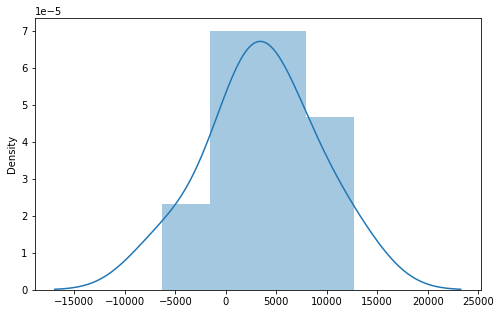

In [22]:
#See distribution of residuals
plt.figure(figsize=(8,5))
sns.distplot(x=df1['Residual'])
plt.show()

In [ ]:
Conclusion:
Model satisfied with linear regression assumptions
simple linear regression perform well with accuracy of 92.45 %